In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib


print("Number gpu's available : ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.config.experimental.list_physical_devices('GPU'))
print(device_lib.list_local_devices())

Number gpu's available :  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3713095995785674923
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4776603246926358907
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
data_dir = '/content/gdrive/MyDrive/computerVision/w9/skin2'

width  = 224
height = 224

batchSize = 32

from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'training',
    seed = 12,
    image_size = (width, height),
    batch_size = batchSize,
    label_mode = 'categorical'
)

validation_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'validation',
    seed = 12,
    image_size = (width, height),
    batch_size = batchSize,
    label_mode = 'categorical'
)

Found 210 files belonging to 4 classes.
Using 168 files for training.
Found 210 files belonging to 4 classes.
Using 42 files for validation.


In [ ]:
classNames = train_ds.class_names 
print(classNames)

['Combination', 'Dry', 'Normal', 'Oily']


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.summary()
from tensorflow.keras.metrics import Recall, Precision
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Recall(), Precision()])



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [ ]:
from datetime import datetime


history = model.fit(
    train_ds,
    batch_size = 32,
    epochs=150,
    validation_data=validation_ds,
    verbose=1
)

model.save('/content/gdrive/MyDrive/computerVision/w9/code/modelIncep.h5')

Epoch 1/150
6/6 [==============================] - 14s 3s/step - loss: 1.2209 - accuracy: 0.5298 - recall: 0.2798 - precision: 0.7344 - val_loss: 1.8544 - val_accuracy: 0.2143 - val_recall: 0.0476 - val_precision: 0.2222
Epoch 2/150
6/6 [==============================] - 2s 330ms/step - loss: 1.0757 - accuracy: 0.5417 - recall: 0.3274 - precision: 0.8333 - val_loss: 1.4567 - val_accuracy: 0.2857 - val_recall: 0.1667 - val_precision: 0.3889
Epoch 3/150
6/6 [==============================] - 2s 268ms/step - loss: 0.9699 - accuracy: 0.7202 - recall: 0.4881 - precision: 0.9011 - val_loss: 7.6345 - val_accuracy: 0.4048 - val_recall: 0.4048 - val_precision: 0.4048
Epoch 4/150
6/6 [==============================] - 2s 260ms/step - loss: 1.0847 - accuracy: 0.6786 - recall: 0.4583 - precision: 0.7624 - val_loss: 100.0140 - val_accuracy: 0.3571 - val_recall: 0.3571 - val_precision: 0.3571
Epoch 5/150
6/6 [==============================] - 2s 243ms/step - loss: 0.8851 - accuracy: 0.6667 - recall:

In [ ]:
import numpy as np 

# print("duration : "+str(end_time - start_time))
print("average loss : ", np.average(history.history['loss']))
print("average accuracy : ", np.average(history.history['accuracy']))
print("average recall : ", np.average(history.history['recall']))
print("average precision : ", np.average(history.history['precision']))

print()

print("average loss : ", np.average(history.history['val_loss']))
print("average accuracy : ", np.average(history.history['val_accuracy']))
print("average recall : ", np.average(history.history['val_recall']))
print("average precision : ", np.average(history.history['val_precision']))



average loss :  0.38137745747963586
average accuracy :  0.9275793639818827
average recall :  0.7285714282592137
average precision :  0.9583672897020976

average loss :  66.09974150935808
average accuracy :  0.4374603249132633
average recall :  0.3979365156466762
average precision :  0.46838136836886407


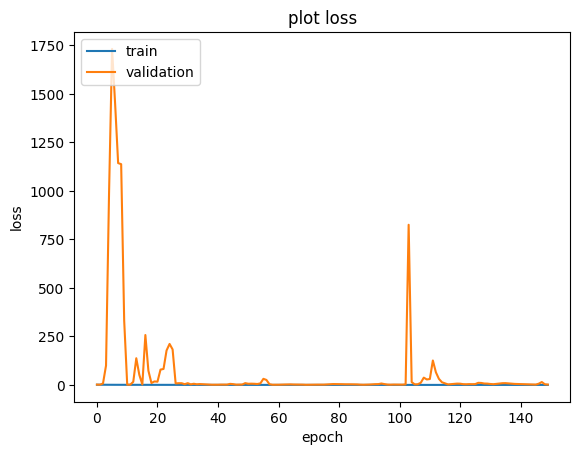

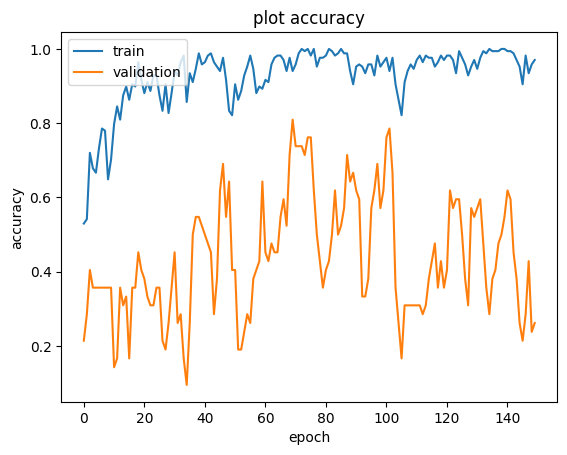

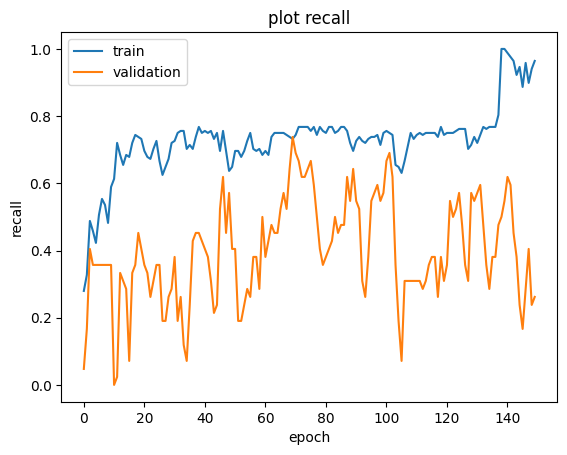

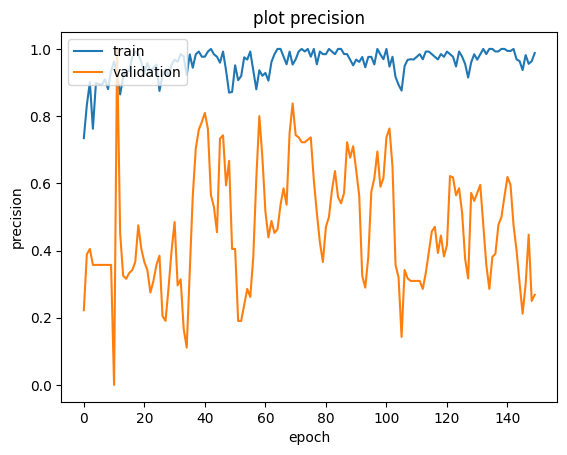

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist, label):
  plt.plot(hist.history[label])
  plt.plot(hist.history['val_'+label])
  plt.title('plot '+label)
  plt.ylabel(label)
  plt.xlabel("epoch")
  plt.legend(['train','validation'], loc='upper left')
  plt.show()

plot_history(history, 'loss')
plot_history(history, 'accuracy')
plot_history(history, 'recall')
plot_history(history, 'precision')


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/gdrive/MyDrive/computerVision/w9/code/modelIncep.h5')
loaded_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.math import confusion_matrix

test_data = ImageDataGenerator()
test_ds = test_data.flow_from_directory(
    "/content/gdrive/MyDrive/computerVision/w9/skin2/test",
    target_size=(width, height),
    batch_size=batchSize,
    class_mode = 'categorical',
)

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# predict = loaded_model.predict_generator(test_ds,steps=len(test_ds),verbose=1)
# test_labels=test_ds.classes
# confusion_matrix(test_labels, predict.argmax(axis=1))

# Make predictions on the test dataset
predictions = loaded_model.predict(test_ds)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels for the test dataset
true_labels = test_ds.classes

# Compute confusion matrix
matrix = confusion_matrix(true_labels, predicted_labels)

# Create a DataFrame from the confusion matrix
df = pd.DataFrame(matrix)

# Display the confusion matrix
print(df)


Found 210 images belonging to 4 classes.
7/7 [==============================] - 2s 259ms/step
    0  1  2   3
0  29  0  1  15
1  29  1  5  16
2  39  2  1  12
3  38  0  4  18


In [ ]:
from sklearn.metrics import classification_report
cr_labels = list(test_ds.class_indices.keys())
classification_report(test_labels, predict.argmax(axis=1), target_names=cr_labels)

'              precision    recall  f1-score   support\n\n Combination       0.21      0.62      0.31        45\n         Dry       0.00      0.00      0.00        51\n      Normal       0.18      0.04      0.06        54\n        Oily       0.25      0.25      0.25        60\n\n    accuracy                           0.21       210\n   macro avg       0.16      0.23      0.16       210\nweighted avg       0.16      0.21      0.15       210\n'

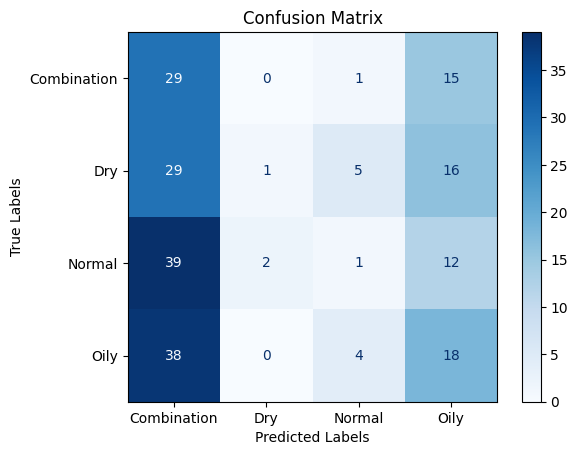

              precision    recall  f1-score     support
Combination    0.214815  0.644444  0.322222   45.000000
Dry            0.333333  0.019608  0.037037   51.000000
Normal         0.090909  0.018519  0.030769   54.000000
Oily           0.295082  0.300000  0.297521   60.000000
accuracy       0.233333  0.233333  0.233333    0.233333
macro avg      0.233535  0.245643  0.171887  210.000000
weighted avg   0.234670  0.233333  0.170960  210.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Get the predicted labels and true labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_ds.classes

# Compute the classification report
report = classification_report(true_labels, predicted_labels, target_names=cr_labels, output_dict=True)

# Convert the classification report to a DataFrame
df = pd.DataFrame(report).transpose()

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cr_labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display the classification report DataFrame
print(df)
